# PySINDy Exploration & Applications

## COLSA Corporation 

### Raj Garkhedkar, DACS Lab Summer 2021 Intern

## Waves


-- -- -- -- -- --
###### Links 

[Convection Diffusion Equation ](https://www.sciencedirect.com/topics/physics-and-astronomy/convection-diffusion-equation)

[Nonlinear Advection Diffusion Equation 2nd Order FD Scheme](https://math.mit.edu/classes/18.086/2014/reports/ZachCordero.pdf)

[All Analytic Sol's Convection Diffusion](https://www.nature.com/articles/s41598-020-63982-w)

[Reflected Sound Discriminator](https://github.com/diabelmehdi/Machine_Learning_project/blob/master/realiz/Documentation/machine%20learning%20report_DIAB_ELMEHDI.pdf)

[Deep Learning Machine Solves the Cocktail Party Problem](https://www.technologyreview.com/2015/04/29/168316/deep-learning-machine-solves-the-cocktail-party-problem/)

[Deep Karaoke: Extracting Vocals](https://arxiv.org/abs/1504.04658)

[Diff Eq's in Physics](https://olewitthansen.dk/Physics/differential_equations_of_physics.pdf)

In [34]:
%matplotlib widget
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.colors as colors
import ipywidgets
import itertools
import scipy.io as sio
import PDE_FIND as pdefind
import pandas as pd
from matplotlib.colors import LightSource
from matplotlib import interactive, rc
from mpl_toolkits.mplot3d import Axes3D
# from IPython.display import HTML
# plt.rcParams["animation.html"] = "jshtml"

## Advection - Diffusion PDE
-- -- --
The equation: 
$$u_t + a u_x = \epsilon u_{xx}$$

This might be the density or concentration of some substance and how the energy, particles, or some other physical quantity is transferred in a physical system through two processes: _diffusion and advection_. The subscripts denote partial differentiation; e.g. $u_t$ is the partial derivative of $u$ with respect to $t$. The coefficients $a$ and $\epsilon$ are constants that determine the strength of the advective and diffusive effects. We wish to find $u(x,t)$. Depending on context, the same equation can be called the advection–diffusion equation, drift–diffusion equation, or scalar transport equation.

In [2]:
2*np.pi

6.283185307179586

### Exact Solution by Fourier Analysis

Solved on a periodic domain $[-\pi,\pi]$, with some initial data: $$u(x,0) = u_0(x)$$

Under the assumption that the solution is composed of a single Fourier mode with wavenumber $\xi$ and time-dependent amplitude $\hat{u}$:
$$u(x,t; \xi) = \hat{u}(t) e^{i\xi x}$$

Then a simple ordinary differential equation for $\hat{u}$:
$$\hat{u}'(t; \xi) + i\xi a \hat{u} = -\xi^2 \epsilon \hat{u}$$

The scalar ODE can be solved exactly:
$$\hat{u}(t; \xi) = e^{(-i \xi a - \epsilon \xi^2)t} \hat{u}(0)$$

Every solution of our advection-diffusion equation can be written as a linear combination (a superposition) of simple solutions of the form above, with different wavenumbers $\xi$. The general solution can be obtained by first, taking a Fourier transform of the initial data:
$$\hat{u}(t=0;\xi) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^\infty u_0(x) e^{-i\xi x}dx$$

Then each mode evolves according to the solution of the ODE above:
$$\hat{u}'(t; \xi) = e^{(-i \xi a - \epsilon \xi^2)t} \hat{u}(0;\xi)$$

A solution is constructed again by taking the inverse Fourier transform, meaning summing up all the Fourier modes:
$$u(x,t) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^\infty \hat{u}_0(x) e^{i\xi x}d\xi$$

Discretizing the integral with finite points in space & time below:

In [3]:
m = 64                          # Number of grid points in space
L = 2 * np.pi                   # Width of spatial domain
x = np.arange(-m/2,m/2)*(L/m)   # Grid points 
dx = x[1]-x[0]                  # Grid spacing

tmax = 8.0   # Final time
N = 50       # # of grid points in time
dt = tmax/N   # interval between output times

xi = np.fft.fftfreq(m)*m*2*np.pi/L 

# Initial data
u = np.sin(2*x)**2 * (x<-L/4)
uhat0 = np.fft.fft(u)

`xi = np.fft.fftfreq(m)*m*2*np.pi/L` order of numpy's FFT frequencies

The functions $u, \hat{u}$ discussed above are replaced by finite-dimensional vectors. These vectors are related through the discrete version of the Fourier transform (DFT). 

Initial conditions:

$$u_0(x) = \begin{cases} \sin^2(2x) & -\pi \le x < -\pi/2 \\ 0 & x>-\pi/2 \end{cases}$$

`diffusion_coef` is epsilon, the diffusion coefficient

`advection_coef` is the advection coefficient

In [4]:
diffusion_coef=0.05   # Diffusion coefficient
advection_coef = 1       # Advection coefficient

In [6]:
# Solution list
frames = [u.copy()]

# Solution to problem
for n in range(1,N+1):
    t = n*dt
    uhat = np.exp(-(1.j*xi*advection_coef + diffusion_coef*xi**2)*t) * uhat0
    u = np.real(np.fft.ifft(uhat))
    frames.append(u.copy())

# Initialize plotting
fig = plt.figure(figsize=(9,4)); axes = fig.add_subplot(111)
line, = axes.plot([],[],lw=3)
axes.set_xlim((x[0],x[-1])); axes.set_ylim((0.,1.))

def plot_frame(i):
    #fig = plt.figure()
    #plt.plot(x,frames[i])
    line.set_data(x,frames[i])
    axes.set_title('t='+str(i*dt))
    fig.canvas.draw()
    return fig

anim = animation.FuncAnimation(fig, plot_frame,
                                   frames=len(frames),
                                   interval=350,
                                   repeat=False)

# def ani(): 
#     animate.FuncAnimation(fig, plot_frame,
#                                    frames=len(frames),
#                                    interval=350,
#                                    repeat=True)
plt.tight_layout()
#anim.save('/Users/rajgark/Documents/GitHub/COLSA-PySINDy/WavesData/anim.mp4')


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

The first approximation was to take the initial data and approximate it by just the first terms in its Fourier series. The vector $\hat{u}$ contains the first 64 Fourier modes (because 64 points are in the spatial grid vector $x$).

The time evolution of the solution is exact for the initial data vector, since it uses the exact solution formula for the ODE above.

### For Generality...
This methodology can be used to solve any linear evolution PDE (including systems of PDEs, like the following scalar PDEs):

$$u_t = \sum_{j=0}^n \alpha_j \frac{\partial^j u}{\partial x^j}.$$
Taking Fourier transform or applying our ansatz:
$$u(x,t; \xi) = \hat{u}(t) e^{i\xi x},$$
The following linear ODE is obtained:
$$\hat{u}'(t) = \left(\sum_{j=0}^n \alpha_j (i\xi)^j\right) \hat{u}(t) = p(\xi)\hat{u}(t)$$
With solution:
$$\hat{u}(t) = e^{p(\xi)t}\hat{u}(0)$$
so that
$$u(x,t; \xi) = e^{i\xi x + p(\xi)t} \hat{u}(0).$$
Here $p(\xi)$ is a polynomial with coefficients $i^j \alpha_j$.

The odd-derivative terms correspond to imaginary terms in $p(\xi)$, which (in the exponential) lead to changes in the phase of the solution, while even-derivative terms correspond to real terms in $p(\xi)$, which lead to changes in the amplitude of the solution.

In [7]:
[len(a) for a in frames][0]

64

In [8]:
framearray = np.asarray(frames)
framearray.shape

(51, 64)

So there are 51 arrays with 64 discretized points of the wave per array, this forms the dataset showing the evolution of the waves. 

In [9]:
Ut,R,rhs_des = pdefind.build_linear_system(framearray, dt, dx, D=2, P=3, time_diff = 'FD', deg_x = 4, width_x = 5, width_t = 6)
w = pdefind.TrainSTRidge(R, Ut, 10**-2, 10, normalize = 2)

print("Candidate functions for PDE")
for func in ['1'] + rhs_des[1:]: print(func)
print('-- -- -- --')
print('Derived PDE:')
pdefind.print_pde(w, rhs_des)

Candidate functions for PDE
1
u
u^2
u^3
u_{x}
uu_{x}
u^2u_{x}
u^3u_{x}
u_{xx}
uu_{xx}
u^2u_{xx}
u^3u_{xx}
-- -- -- --
Derived PDE:
u_t = (-0.374213 -0.000000i)u_{x}
   


/Users/rajgark/Documents/GitHub/COLSA-PySINDy/PDE_FIND.py:430: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  w_best = np.linalg.lstsq(TrainR, TrainY)[0]
/Users/rajgark/Documents/GitHub/COLSA-PySINDy/PDE_FIND.py:575: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if lam != 0: w = np.linalg.lstsq(X.T.dot(X) + lam*np.eye(d),X.T.dot(y))[0]
/Users/rajgark/Documents/GitHub/COLSA-PySINDy/PDE_FIND.py:601: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the i

In [10]:
print(dx)
print(dt)

0.09817477042468115
0.16


## PDE-FIND Implementation
Below is the PDE-FIND replication exercise for their advection diffusion coefficient discovery method. 
A time series of length $10^6$ is generated with $x_{n+1} \sim \mathcal{N}(x_n, dt)$. From this we approximate the distribution function of the future potision of the trajectory and fit to a PDE. In theory, we expect $f_t = 0.5f_{xx}$. The algorithm achieves the correct PDE with parameter error $\sim 10^{-3}$.

A second time series is used to try to identify the advection diffusion equation. This time, $x_{n+1} \sim \mathcal{N}(x_n + c dt, dt)$. We expect the distribution function to follow $f_t = 0.5f_{xx} - c f_x$. Trying a few different sparsity promoting methods yields different results, with greedy algorithm being the only one that works.

### Diffusion

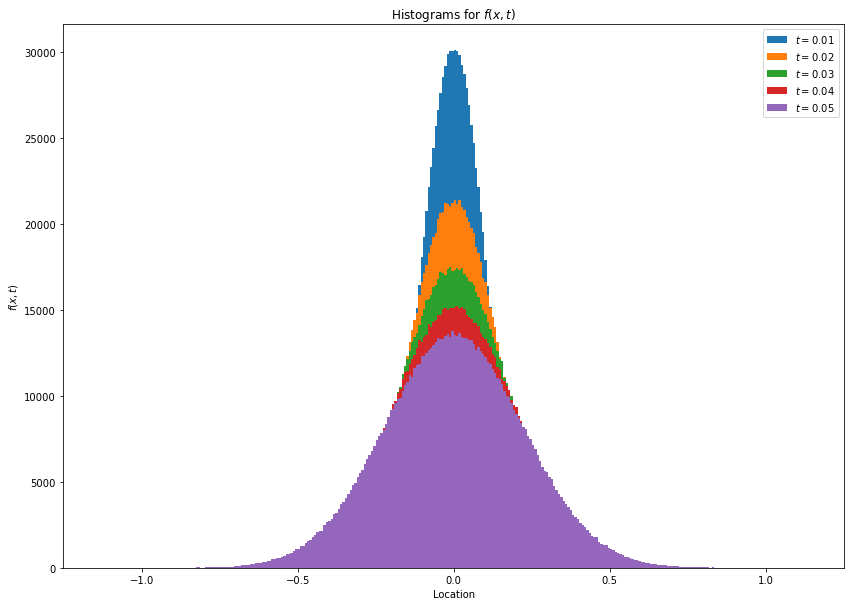

In [13]:
plt.figure(figsize = (14,10))
'''
Data Generation
'''
length = 10**6
dt = 0.01
np.random.seed(0)
pos = np.cumsum(np.sqrt(dt)*np.random.randn(length))

P = {}
M = 0

m = 5
n = 300

for i in range(m):
    P[i] = []
    
for i in range(len(pos)-m):
    
    # center
    y = pos[i+1:i+m+1] - pos[i]
    M = max([M, max(abs(y))])
    
    # add to distribution
    for j in range(m):
        P[j].append(y[j])
    
bins = np.linspace(-M,M,n+1)
x = np.linspace(M*(1/n-1),M*(1-1/n),n)
dx = x[2]-x[1]
T = np.linspace(0,dt*(m-1),m)
U = np.zeros((n,m))
for i in range(m):
    U[:,i] = plt.hist(P[i],bins,label=r'$t = $' + str(i*dt+dt))[0]/float(dx*(len(pos)-m))
    
plt.xlabel('Location')
plt.ylabel(r'$f(x,t)$')
plt.title(r'Histograms for $f(x,t)$')
#xticks(fontsize = tickfontsize); yticks(fontsize = tickfontsize)
plt.legend(loc = 'upper right')
plt.show()

In [14]:
U.shape

(300, 5)

In [15]:
Ut,R,rhs_des = pdefind.build_linear_system(U, dt, dx, D=4, P=5, time_diff = 'FD', deg_x = 4, width_x = 30, width_t = 1)
w = pdefind.TrainSTRidge(R, Ut, 10**-2, 10, normalize = 2)

print("Candidate functions for PDE")
for func in ['1'] + rhs_des[1:]: print(func)

print("\nPDE derived from data:")
pdefind.print_pde(w, rhs_des)

Candidate functions for PDE
1
u
u^2
u^3
u^4
u^5
u_{x}
uu_{x}
u^2u_{x}
u^3u_{x}
u^4u_{x}
u^5u_{x}
u_{xx}
uu_{xx}
u^2u_{xx}
u^3u_{xx}
u^4u_{xx}
u^5u_{xx}
u_{xxx}
uu_{xxx}
u^2u_{xxx}
u^3u_{xxx}
u^4u_{xxx}
u^5u_{xxx}
u_{xxxx}
uu_{xxxx}
u^2u_{xxxx}
u^3u_{xxxx}
u^4u_{xxxx}
u^5u_{xxxx}

PDE derived from data:
u_t = (0.495107 +0.000000i)u_{xx}
   


### Advection - Diffusion

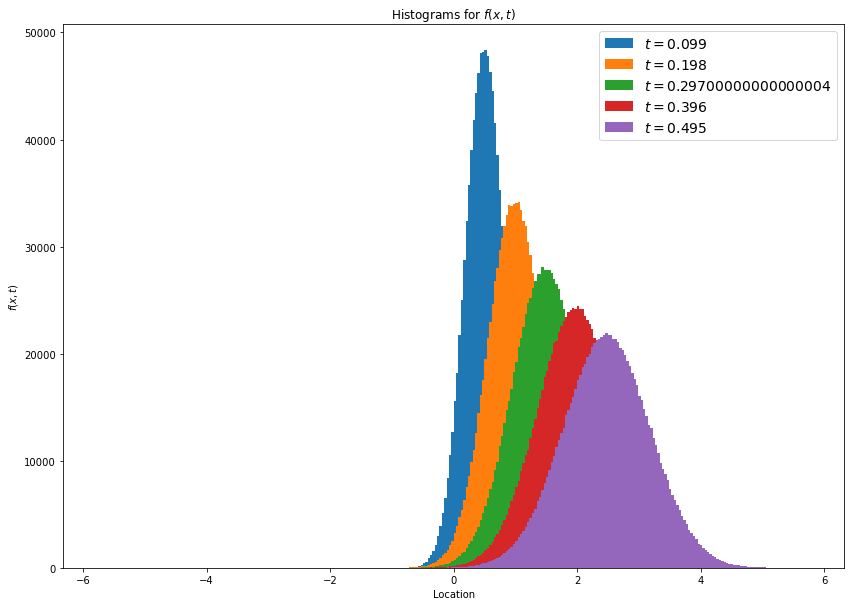

In [16]:
plt.figure(figsize = (14,10))
''' 
Data Generation
'''
length = 10**6

dt = 0.099    # Diffusion Term
c = 5         # Advection Term
np.random.seed(0)
pos = np.cumsum(np.sqrt(dt)*np.random.randn(length)) + c*dt*np.arange(length)

P = {}
M = 0

m = 5
n = 300

for i in range(m):
    P[i] = []
    
for i in range(len(pos)-m):
    
    # center
    y = pos[i+1:i+m+1] - pos[i]
    M = max([M, max(abs(y))])
    
    # add to distribution
    for j in range(m):
        P[j].append(y[j])
    
bins = np.linspace(-M,M,n+1)
x = np.linspace(M*(1/n-1),M*(1-1/n),n)
dx = x[2]-x[1]
T =  np.linspace(0,dt*(m-1),m)
U = np.zeros((n,m))
for i in range(m):
    U[:,i] = plt.hist(P[i],bins,label=r'$t = $' + str(i*dt+dt))[0]/float(dx*(len(pos)-m))
    
    
plt.xlabel('Location')
plt.ylabel(r'$f(x,t)$')
plt.title(r'Histograms for $f(x,t)$')
#plt.xticks(fontsize = tickfontsize); yticks(fontsize = tickfontsize)
plt.legend(loc = 'upper right', fontsize = 14)
plt.show()

Now try to identify the dynamics. This is an example of how different sparsity promoting regression methods can behave differently. Here the STRidge algorithm works only when the data is not normalized. The greedy algorithm seems to be fairly robust to small changes, and Lasso works with some tuning (maybe only because we know the right answer). Normally STRidge with $L^2$ normalization outperforms all the rest.

In [20]:
Ut,R,rhs_des = pdefind.build_linear_system(U, dt, dx, D=4, P=5, time_diff = 'FD', deg_x = 4, width_x = 30, width_t = 1)

print("Candidate functions for PDE")
for func in ['1'] + rhs_des[1:]: print(func)
print('-- -- -- -- -- -- -- --')
print("\nPDE derived with STRidge and L^2 normalization (Somewhat Correct PDE)")
w = pdefind.TrainSTRidge(R, Ut, 1, 4, normalize = 2)
pdefind.print_pde(w, rhs_des)

print("PDE derived with STRidge without normalization")
w = pdefind.TrainSTRidge(R, Ut, 1, 0.01, normalize = 0)
pdefind.print_pde(w, rhs_des)

print("PDE derived with greedy algorithm (Correct PDE!)")
w = pdefind.FoBaGreedy(R, Ut,10)
pdefind.print_pde(w, rhs_des)

print("PDE derived with LASSO algorithm")
w = pdefind.Lasso(R, Ut,10)
pdefind.print_pde(w, rhs_des)

Candidate functions for PDE
1
u
u^2
u^3
u^4
u^5
u_{x}
uu_{x}
u^2u_{x}
u^3u_{x}
u^4u_{x}
u^5u_{x}
u_{xx}
uu_{xx}
u^2u_{xx}
u^3u_{xx}
u^4u_{xx}
u^5u_{xx}
u_{xxx}
uu_{xxx}
u^2u_{xxx}
u^3u_{xxx}
u^4u_{xxx}
u^5u_{xxx}
u_{xxxx}
uu_{xxxx}
u^2u_{xxxx}
u^3u_{xxxx}
u^4u_{xxxx}
u^5u_{xxxx}
-- -- -- -- -- -- -- --

PDE derived with STRidge and L^2 normalization (Somewhat Correct PDE)
u_t = (-5.020790 -0.000000i)u_{x}
   
PDE derived with STRidge without normalization
u_t = (5.171523 +0.000000i)u
    + (125.623016 +0.000000i)u^2
    + (-837.739502 +0.000000i)u^3
    + (1317.542969 +0.000000i)u^4
    + (-526.133545 +0.000000i)u^5
    + (-4.967099 +0.000000i)u_{x}
    + (-0.110326 +0.000000i)uu_{x}
    + (1.511479 +0.000000i)u_{xx}
    + (-62.513069 +0.000000i)uu_{xx}
    + (294.402374 +0.000000i)u^3u_{xx}
    + (-277.603088 +0.000000i)u^4u_{xx}
    + (82.834328 +0.000000i)u^5u_{xx}
    + (-7.360250 +0.000000i)uu_{xxxx}
    + (11.511306 +0.000000i)u^2u_{xxxx}
    + (12.731939 +0.000000i)u^3u_{xxxx}
 

### Reaction Diffusion System, PDE-FIND Implementation

PDE-FIND on a reaction diffusion system exhibiting sprial waves on a periodic domain. We derive PDE's for each of two quantities, having dependancies on each other; $u$ and $v$.

$$\begin{align*} u_t &= 0.1\nabla^2 u + \lambda(A)u - \omega(A)v\\ v_t &= 0.1\nabla^2 v + \omega(A)u + \lambda(A)v\\ A^2 &= u^2 + v^2,\, \omega(A) = -\beta A^2, \lambda(A) = 1-A^2 \end{align*}$$

Unlike other implmentations, we allow for $u_t$ to be dependent on derivatives of $v$, even though this is not the case in the true PDE. The sparse regression is still able to derive the correct PDE.
-- -- -- -- 
##### Notes

Their dataset wasn't generated, was just a MATLAB script & function. I generated data from their MATLAB code & carried out the rest of the notebook, dataset in the repo. 

In [36]:
# Keep hashed out
# Below code converts MATLAB Generated Data to .csv 

'''
data = sio.loadmat('/Users/rajgark/Desktop/reacdiffdataset.mat')
t = data['t'][:,0]
x = data['x'][0,:]
y = data['y'][0,:]
U = data['u']
V = data['v']

reacdiffdict = {
    't': t,
    'x': x,
    'y': y,
    'U': U,
    'V': V
}

with open('reacdiffcsv.csv', 'w') as f:
    for key in reacdiffdict.keys():
        f.write("%s,%s\n"%(key,reacdiffdict[key]))
'''

In [15]:
def discrete_laplacian(u, bdy):
    if bdy == 'Periodic':
        L = -4*u
        L += np.roll(u, (0,-1), (0,1))
        L += np.roll(u, (0,+1), (0,1))
        L += np.roll(u, (-1,0), (0,1))
        L += np.roll(u, (+1,0), (0,1))
        return L
    elif bdy == 'Dirichlet':
        v = np.pad(u, 1, constant_values=0)
    elif bdy == 'Neumann':
        v = np.pad(u, 1, mode='edge')
    L = -4*v
    L += np.roll(v, (0,-1), (0,1))
    L += np.roll(v, (0,+1), (0,1))
    L += np.roll(v, (-1,0), (0,1))
    L += np.roll(v, (+1,0), (0,1))
    L = L[1:-1,1:-1]
    return L

def leapfrog(u0, um, cfl, bdy):
    up = 2*u0 - um + cfl**2*discrete_laplacian(u0, bdy)
    return up, u0

def define_initial_condition(f, g, dt, bdy):
    u0 = f + 0.5*cfl**2*discrete_laplacian(f, bdy) + dt*g
    return u0, f

def update_solution(f, g, cfl, dt, bdy, Nframes, Nskip):
    n = 0
    u0, um = define_initial_condition(f, g, dt, bdy)
    while n<Nframes:
        n += 1
        for k in range(Nskip):
            u0, um = leapfrog(u0, um, cfl, bdy)
        yield u0

def update_graph(u, ls, imu):
    imu.set_array(ls.hillshade(u))

<IPython.core.display.Javascript object>


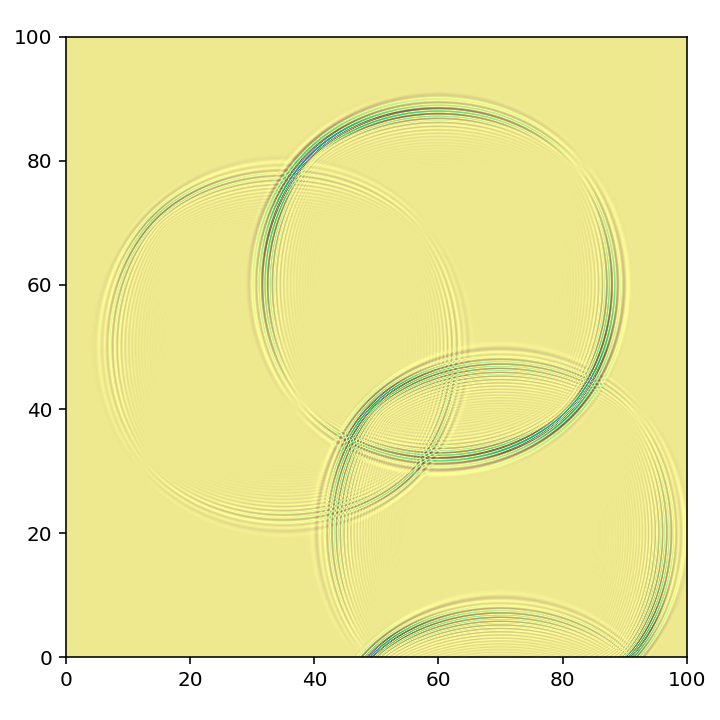

In [16]:
%matplotlib notebook

np.random.seed()

# model parameter
c = 1       # speed constant
L = 100      # domain length

# numerical parameters
N = 800    # grid size

# define a function that simulates a raindrop
def pebble(X, Y, width, positionX, positionY):
    r = width*np.sqrt((X-positionX)**2 + (Y-positionY)**2)
    u = np.random.uniform(-1., 1., 1)*np.cos(1.9*r)/np.cosh(r)
    return u

x = np.linspace(0, L, N)
X, Y = np.meshgrid(x, x)

# initial displacement consists of three separate raindrops 
f =  pebble(X, Y, 3.5, 0.35*L, 0.5*L)
f += pebble(X, Y, 3, 0.6*L, 0.6*L)
f += pebble(X, Y, 4, 0.7*L, 0.2*L)

# initial velocity is zero
g = np.zeros((N,N))

# animation parameters
Nsteps = 400
Nskip = 10

# set time step to satisfy leapfrog stability criterion (cfl < 1/sqrt(2) ~ 0.7)
cfl = 0.6
dx = L/N
dt = cfl * dx / c
#dt = 0.00001

# compute and animate solution
Nframes = int(Nsteps/Nskip)
extent = [0, L, 0, L]

fig, ax = plt.subplots(1,1,figsize=(5,5))
ls = LightSource(azdeg=220, altdeg=70)
imu = ax.imshow(ls.hillshade(f), cmap='terrain', animated=True, extent=extent, origin='lower')
ani = animate.FuncAnimation(fig, update_graph,
                              update_solution(f, g, cfl, dt, 'Neumann', Nframes, Nskip),
                              fargs=(ls, imu), repeat=False)
plt.tight_layout()
plt.show()

In [17]:
f.shape

(800, 800)

In [18]:
Ut, R, rhs_des = pdefind.build_linear_system(f, dt, dx, D=3, P=3, time_diff = 'FD', space_diff = 'FD')

In [19]:
['1']+rhs_des[1:]

['1',
 'u',
 'u^2',
 'u^3',
 'u_{x}',
 'uu_{x}',
 'u^2u_{x}',
 'u^3u_{x}',
 'u_{xx}',
 'uu_{xx}',
 'u^2u_{xx}',
 'u^3u_{xx}',
 'u_{xxx}',
 'uu_{xxx}',
 'u^2u_{xxx}',
 'u^3u_{xxx}']

In [20]:
w = pdefind.TrainSTRidge(R,Ut,10**-5,5)
print("PDE derived using STRidge")
pdefind.print_pde(w, rhs_des)

PDE derived using STRidge
u_t = (0.298698 +0.000000i)u^3
    + (0.133576 +0.000000i)u^3u_{x}
    + (0.005665 +0.000000i)u^2u_{xx}
    + (0.002342 +0.000000i)u^3u_{xxx}
   
